In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import sklearn as skl

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
file_path = '/content/drive/MyDrive/Datasets/vgsales.csv'
dataset = pd.read_csv(file_path)
dataset.head()

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,259,Asteroids,2600,1980,Shooter,Atari,4.00,0.26,0.0,0.05,4.31
1,545,Missile Command,2600,1980,Shooter,Atari,2.56,0.17,0.0,0.03,2.76
2,1768,Kaboom!,2600,1980,Misc,Activision,1.07,0.07,0.0,0.01,1.15
3,1971,Defender,2600,1980,Misc,Atari,0.99,0.05,0.0,0.01,1.05
4,2671,Boxing,2600,1980,Fighting,Activision,0.72,0.04,0.0,0.01,0.77


In [ ]:
dataset.shape

(16324, 11)

In [ ]:
dataset.dtypes

,0
Rank,int64
Name,object
Platform,object
Year,int64
Genre,object
Publisher,object
NA_Sales,float64
EU_Sales,float64
JP_Sales,float64
Other_Sales,float64


In [ ]:
dataset.isnull().sum().sum()

36

In [ ]:
dataset.dropna(axis = 0, inplace = True)
dataset.head()

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,259,Asteroids,2600,1980,Shooter,Atari,4.00,0.26,0.0,0.05,4.31
1,545,Missile Command,2600,1980,Shooter,Atari,2.56,0.17,0.0,0.03,2.76
2,1768,Kaboom!,2600,1980,Misc,Activision,1.07,0.07,0.0,0.01,1.15
3,1971,Defender,2600,1980,Misc,Atari,0.99,0.05,0.0,0.01,1.05
4,2671,Boxing,2600,1980,Fighting,Activision,0.72,0.04,0.0,0.01,0.77


In [ ]:
dataset.isnull().sum().sum()

0

# **Feature Scaling**
# **Standard Scaler**
It's a preprocessing technique that transforms continuous data to make it look normally distributed.
We want the data scaled so that its mean becomes zero and standard deviation becomes one. We use this when there is high variance in the data or when the data is not distributed normally.

Formula = Xi-mean(x)/stdev(x)

<Axes: ylabel='Density'>

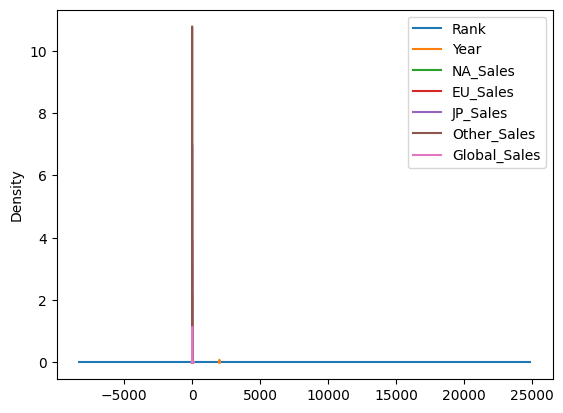

In [ ]:
dataset.plot.kde()  #plotting data

In [ ]:
from sklearn.preprocessing import StandardScaler
ss = StandardScaler()

In [ ]:
numerical_features =dataset.select_dtypes(include =np.number).columns
data_transform = ss.fit_transform(dataset[numerical_features])  #transforming the data
dataset_transformed = pd.DataFrame(data_transform,columns=numerical_features)
dataset_transformed.head()



,Rank,Year,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,-1.675716,-4.528884,4.540327,0.220371,-0.25279,0.008233,2.404577
1,-1.616031,-4.528884,2.789514,0.043668,-0.25279,-0.096979,1.415694
2,-1.360808,-4.528884,0.977908,-0.152668,-0.25279,-0.202190,0.388531
3,-1.318445,-4.528884,0.880640,-0.191935,-0.25279,-0.202190,0.324732
4,-1.172364,-4.528884,0.552363,-0.211569,-0.25279,-0.202190,0.146095


<Axes: ylabel='Density'>

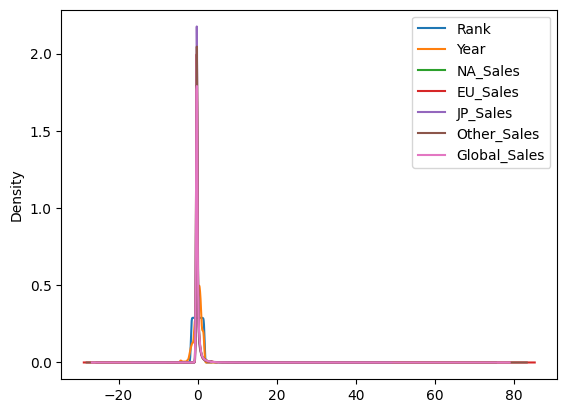

In [ ]:
dataset_transformed.plot.kde()

# **MinMax Scaler**


*   Most popular
*   subtract min of the column and divide by difference between max and min
Xi - min(x)/max(x)-min(x)


*   shifts data etween 0&1.
*   if distribution not suitable for StanadardScaler, this scaler works out(Sensitive to outliers)






In [ ]:
from sklearn.preprocessing import MinMaxScaler
mm = MinMaxScaler()

In [ ]:
data_transform = mm.fit_transform(dataset[numerical_features])
dataset_transformed = pd.DataFrame(data_transform,columns = numerical_features)


<Axes: ylabel='Density'>

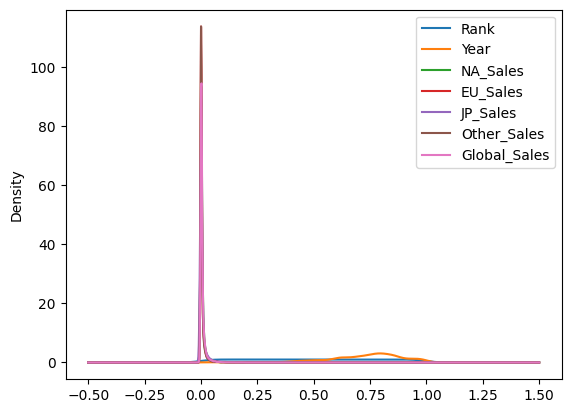

In [ ]:
dataset_transformed.plot.kde()

In [ ]:
dataset_transformed.head()

,Rank,Year,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,0.015543,0.0,0.096409,0.008959,0.0,0.004730,0.051976
1,0.032773,0.0,0.061702,0.005858,0.0,0.002838,0.033241
2,0.106452,0.0,0.025789,0.002412,0.0,0.000946,0.013780
3,0.118682,0.0,0.023861,0.001723,0.0,0.000946,0.012571
4,0.160853,0.0,0.017354,0.001378,0.0,0.000946,0.009187


# **Robust Scaler**


*   Suitable for data with outlier
*   calculate by subtracting 1st quartile and divided by difference between third quartile and 1st quartile.
Quartile means(25%,50%,75%)pof the data.

Formula :  Xi - Q1(x)/Q3(x)-Q1(x)


In [ ]:
Data = pd.DataFrame ({
    'x1': np.concatenate([np.random.normal(20, 1, 1000),np.random.normal(1, 1, 25)]),
    'x2': np.concatenate([np.random.normal(50, 10, 1000),np.random.normal(50, 1, 25)]),
})

<Axes: ylabel='Density'>

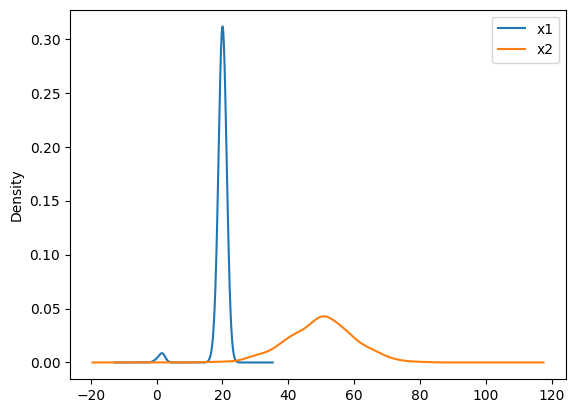

In [ ]:
Data.plot.kde()

In [ ]:
from sklearn.preprocessing import RobustScaler
rs = RobustScaler()

In [ ]:
data_tf= rs.fit_transform(Data)


In [ ]:
data_transformed = pd.DataFrame (data_tf,columns =Data.columns)

<Axes: ylabel='Density'>

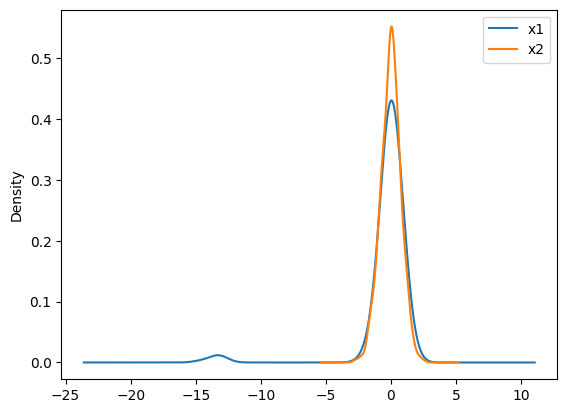

In [ ]:
data_transformed.plot.kde()

# **Normalizer**
Each parameter value is obtained by dividing by magnitude.

Formula :   norm = Xi / sqrt(sum(square(x)))

In [ ]:
df = pd.DataFrame({
    'x1' : np.random.randint(-100,100,1000).astype(float),
    'y1' : np.random.randint(-80,80,1000).astype(float),
    'z1' : np.random.randint(-150,150,1000).astype(float),
})

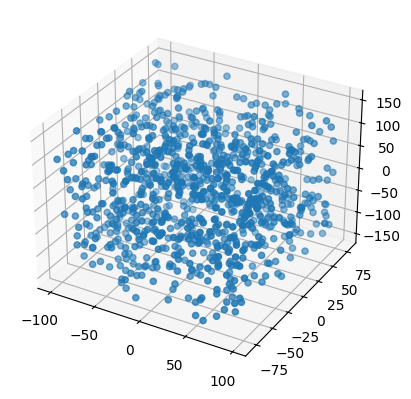

In [ ]:
fig = plt.figure()
ax = plt.axes(projection='3d')
ax.scatter3D(df.loc[:, 'x1'], df.loc[:, 'x2'], df.loc[:, 'x3'])
plt.show()

In [ ]:
from sklearn.preprocessing import Normalizer
norm = Normalizer()

In [ ]:
data_transform = norm.fit_transform(df)

In [ ]:
data_transformed = pd.DataFrame(data_transform,columns = df.columns)

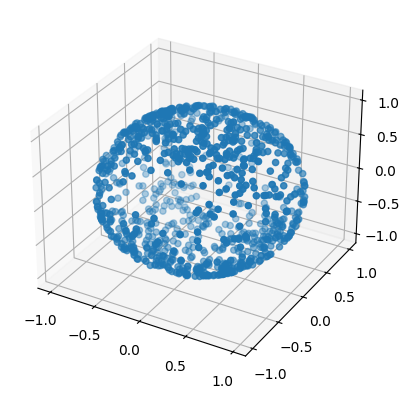

In [ ]:
ax = plt.axes(projection = '3d')
ax.scatter3D(data_transformed.loc[:, 'x1'], data_transformed.loc[:, 'x2'], data_transformed.loc[:, 'x3'])
plt.show()

# **Binarization**


*   Thresholding numerical values to binary values(0 or 1)
*   A few learning algorithms assume data to be in bernouli's distribution- bernouli naive bayes



In [ ]:
x = np.array([[1., -1., 2.],
              [2., 0., 0.],
              [0., 1., -1.]])
# this is probability based like this person is male or female etc.

In [ ]:
from sklearn.preprocessing import Binarizer

In [ ]:
bz =  Binarizer()

In [ ]:
data_tf = bz.fit_transform(x)

In [ ]:
data_tf

array([[1., 0., 1.],
       [1., 0., 0.],
       [0., 1., 0.]])

In [ ]:
data_transformed = pd.DataFrame(data_tf,columns = ['col1','col2','col3'])

<Axes: ylabel='Density'>

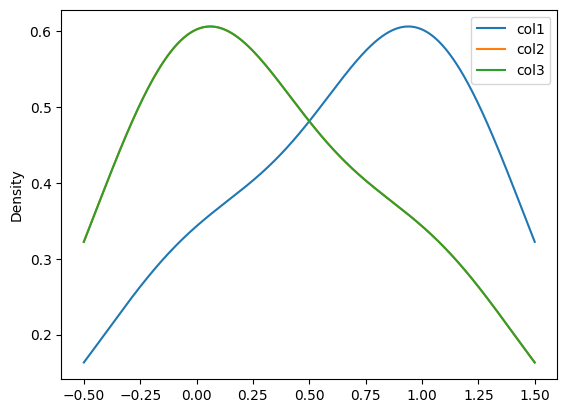

In [ ]:
data_transformed.plot.kde()

# **Encoding categorical values**
**Encoding ordinal values**



*   Ordinal values: low, medium,high relationship between values
*   label encoding with right mapping



In [ ]:
df = pd.DataFrame({
    'Age':[33,64,22,44,55,22],
    'income':['high','low','medium','medium','low','high']
})

In [ ]:
df

,Age,income
0,33,high
1,64,low
2,22,medium
3,44,medium
4,55,low
5,22,high


In [ ]:
data = df.income.map({'low':1,'medium':2,'high':3})
data

,income
0,3
1,1
2,2
3,2
4,1
5,3


<Axes: ylabel='Density'>

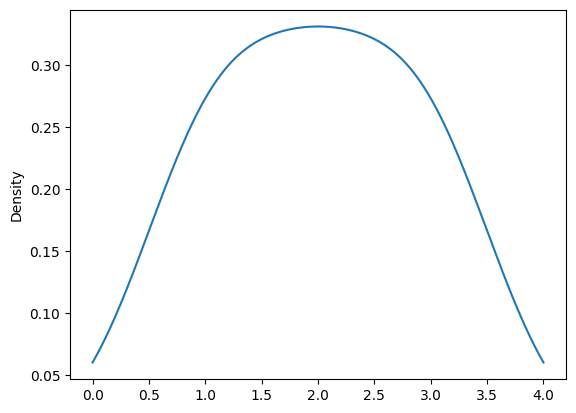

In [ ]:
data.plot.kde()      #we can use transformer here as well

In [ ]:
from sklearn.preprocessing import MinMaxScaler    #Applied this scaler just for practice and to see results regardless of the fact that it's required here or nor

In [ ]:
mm = MinMaxScaler()

In [ ]:
data_tf = mm.fit_transform(data.values.reshape(-1, 1))

In [ ]:
data_transformed = (pd.DataFrame(data_tf,columns = ['income']))

<Axes: ylabel='Density'>

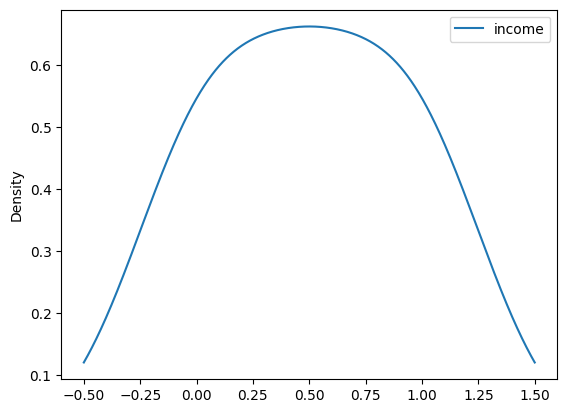

In [ ]:
data_transformed.plot.kde()

In [ ]:
df = pd.DataFrame({
    'Age':[33,64,22,44,55,22],
    'income':['high','low','medium','medium','low','high']
})

In [ ]:
df

,Age,income
0,33,high
1,64,low
2,22,medium
3,44,medium
4,55,low
5,22,high


In [ ]:
data = df.income.map({'low':1,'medium':2,'high':3})
data

,income
0,3
1,1
2,2
3,2
4,1
5,3


# **Encoding Nominal Values**


*   Nominal values: male,female no relationship between data
*   One hot encoding for converting data into one hot vector



In [ ]:
df = pd.DataFrame({
    'Age':[33,64,22,44,55,22],
    'Gender':['male','female','female','male','male','female']
})

In [ ]:
df.Gender.unique()

array(['male', 'female'], dtype=object)

In [ ]:
from sklearn.preprocessing import LabelEncoder,OneHotEncoder

In [ ]:
Le = LabelEncoder()

In [ ]:
df['Gender_tf'] = Le.fit_transform(df.Gender)

In [ ]:
df

,Age,Gender,Gender_tf
0,33,male,1
1,64,female,0
2,22,female,0
3,44,male,1
4,55,male,1
5,22,female,0


In [ ]:
OneHotEncoder().fit_transform(df[['Gender_tf']]).toarray()

array([[0., 1.],
       [1., 0.],
       [1., 0.],
       [0., 1.],
       [0., 1.],
       [1., 0.]])

# **Imputation**


*   Missing values can not be processed by learning algorithms
*   imputers can be used to infer value of missing data from existing data


In [ ]:
df = pd.DataFrame({
    'Age':[33,64,22,44,np.nan,22],
    'salary':[200,100,500,np.nan,700,70]
})

In [ ]:
from sklearn.impute import SimpleImputer

In [ ]:
imputer = SimpleImputer(missing_values=np.nan,strategy='mean')

In [ ]:
imputer.fit_transform(df)

array([[ 33., 200.],
       [ 64., 100.],
       [ 22., 500.],
       [ 44., 314.],
       [ 37., 700.],
       [ 22.,  70.]])

<Axes: ylabel='Density'>

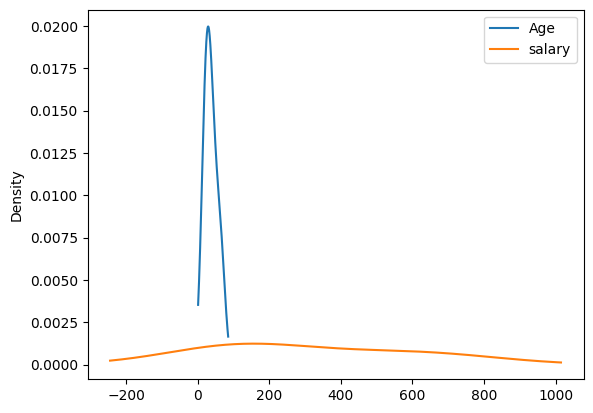

In [ ]:
df.plot.kde()

# **Polynomial Features**


*   Driving non-liear feature by converting data into higher medium
*   Used with polynomial regression to learn model of higher degree
regression forms when two values are correlated



In [ ]:
df = pd.DataFrame({'A':[1,2,3,4,5],'B':[2,3,4,5,6]})
df

,A,B
0,1,2
1,2,3
2,3,4
3,4,5
4,5,6


In [ ]:
from sklearn.preprocessing import PolynomialFeatures
ppf = PolynomialFeatures(degree=2)

In [ ]:
ppf.fit_transform(df)

array([[ 1.,  1.,  2.,  1.,  2.,  4.],
       [ 1.,  2.,  3.,  4.,  6.,  9.],
       [ 1.,  3.,  4.,  9., 12., 16.],
       [ 1.,  4.,  5., 16., 20., 25.],
       [ 1.,  5.,  6., 25., 30., 36.]])

# **Custom Transformer**


*   Often you will want to convert an existing python function into a transformer to assist in data cleaning or processing

*   Function Transformer is used to create a transformer
*   validate = False is required for string columns



In [ ]:
from sklearn.preprocessing import FunctionTransformer

In [ ]:
def mapping(x):
  x['Age'] = x['Age']+2
  x['Counter'] =x['Counter']*2
  return x

In [ ]:
customTransformer = FunctionTransformer(mapping,validate=False)

In [ ]:
df = pd.DataFrame({
    'Age':[33,64,22,44,55,22],
    'Counter':[1,2,3,4,5,6]
})
df

,Age,Counter
0,33,1
1,64,2
2,22,3
3,44,4
4,55,5
5,22,6


In [ ]:
customTransformer.transform(df)

,Age,Counter
0,35,2
1,66,4
2,24,6
3,46,8
4,57,10
5,24,12


# **Text preprocessing**


*   Learning algorithms does not understand text but only numbers
*   Following methods convert text to numbers



# **CountVectorizer**


*   Each column represents one word,count refers to frequency of the word
*   Sequence of words is not maintained (it's a drawback)

# Hyperparameters


*   n_grams : number of words considered for each column
*   stop-words: not considered


*   Vocabulary- only words considered






In [ ]:
corpus = [
    'This is the first document.',
    'This document is the second document.',
    'And this is the third one.',
    'Is this the first document?',
]
df = pd.DataFrame({'Text':corpus})
df

,Text
0,This is the first document.
1,This document is the second document.
2,And this is the third one.
3,Is this the first document?


In [ ]:
from sklearn.feature_extraction.text import CountVectorizer

In [ ]:
cv = CountVectorizer()

In [ ]:
cv.fit_transform(df.Text).toarray()

array([[0, 1, 1, 1, 0, 0, 1, 0, 1],
       [0, 2, 0, 1, 0, 1, 1, 0, 1],
       [1, 0, 0, 1, 1, 0, 1, 1, 1],
       [0, 1, 1, 1, 0, 0, 1, 0, 1]])

In [ ]:
cv.vocabulary_

{'this': 8,
 'is': 3,
 'the': 6,
 'first': 2,
 'document': 1,
 'second': 5,
 'and': 0,
 'third': 7,
 'one': 4}

In [ ]:
cv = CountVectorizer(stop_words=['is','the'])

In [ ]:
cv.fit_transform(df.Text).toarray()

array([[0, 1, 1, 0, 0, 0, 1],
       [0, 2, 0, 0, 1, 0, 1],
       [1, 0, 0, 1, 0, 1, 1],
       [0, 1, 1, 0, 0, 0, 1]])

In [ ]:
cv.vocabulary_

{'this': 6,
 'first': 2,
 'document': 1,
 'second': 4,
 'and': 0,
 'third': 5,
 'one': 3}

In [ ]:
cv = CountVectorizer(vocabulary=['document','first'])
cv.fit_transform(df.Text).toarray()

array([[1, 1],
       [2, 0],
       [0, 0],
       [1, 1]])

In [ ]:
cv = CountVectorizer(ngram_range=(1,2))
cv.fit_transform(df.Text).toarray()

array([[0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0],
       [0, 0, 2, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0],
       [1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0],
       [0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1]])

# **Image processing using skimage**

In [ ]:
from skimage.io import imread, imshow

In [ ]:
image = imread('/content/drive/MyDrive/Datasets/free-nature-images.jpg')

In [ ]:
image.shape      #image resolution (height,width,colour range)

(630, 1200, 3)

In [ ]:
image[0]

array([[  1,  49, 113],
       [  2,  50, 114],
       [  4,  49, 114],
       ...,
       [193, 220, 237],
       [194, 221, 238],
       [194, 221, 238]], dtype=uint8)

<ipython-input-10-3d9a59bd2b38>:1: FutureWarning: `imshow` is deprecated since version 0.25 and will be removed in version 0.27. Please use `matplotlib`, `napari`, etc. to visualize images.
  imshow(image)


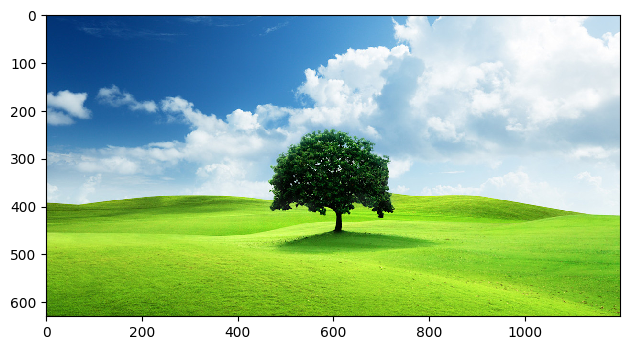

In [ ]:
imshow(image)

In [ ]:
from skimage.color import rgb2gray

In [ ]:
rgb2gray(image).shape

(630, 1200)

<ipython-input-13-75c188effffe>:1: FutureWarning: `imshow` is deprecated since version 0.25 and will be removed in version 0.27. Please use `matplotlib`, `napari`, etc. to visualize images.
  imshow(rgb2gray(image))


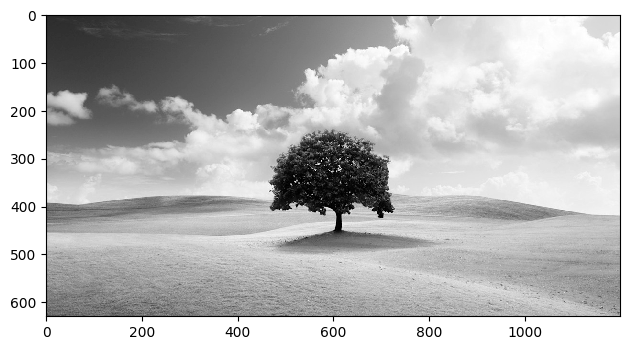

In [ ]:
imshow(rgb2gray(image))

In [ ]:
from skimage.transform import resize

<ipython-input-17-47f3e4b9a288>:1: FutureWarning: `imshow` is deprecated since version 0.25 and will be removed in version 0.27. Please use `matplotlib`, `napari`, etc. to visualize images.
  imshow(resize(image,(200,400)))


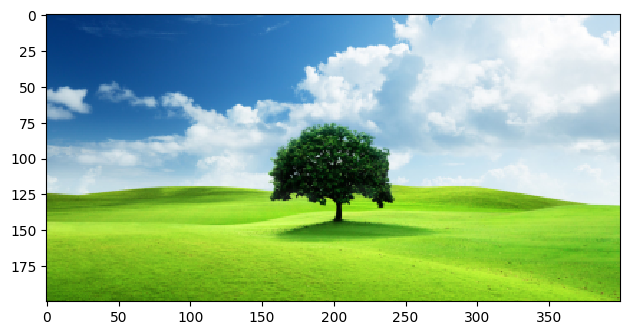

In [ ]:
imshow(resize(image,(200,400)))